In [1099]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [1100]:
df1 = pd.read_csv("Honors Thesis Depression Datasets.csv")

In [1101]:
df1

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,37.0,32.5,41.8,32.5 - 41.8,36.0-38.2
5360,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,40.1,36.9,43.4,36.9 - 43.4,38.3-40.1
5361,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,39.1,32.9,45.5,32.9 - 45.5,38.3-40.1
5362,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,30.4,26.4,34.6,26.4 - 34.6,25.5-35.9


In [1102]:
import seaborn as sns

In [1108]:
df1['Group'] = df1['Group'].replace('By Race/Hispanic ethnicity', 'By Race')

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

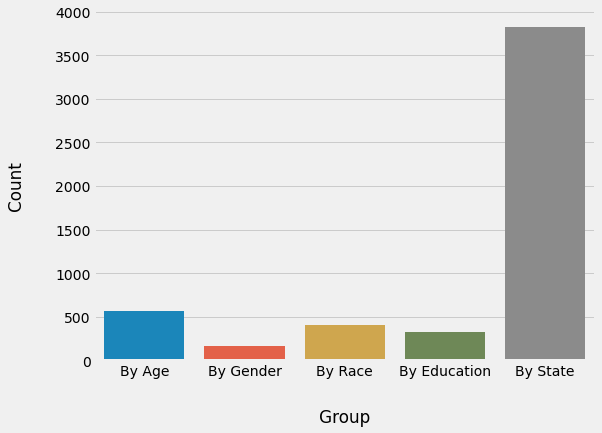

In [1121]:
plt.figure(figsize=(8, 6))
df_filtered = df1[df1['Group'] != 'National Estimate']
ax = sns.countplot(df_filtered["Group"])
ax.set_xlabel('Group', labelpad=30)
ax.set_ylabel('Count', labelpad=30)

In [1122]:
df_age= df1.loc[df1['Group'] == 'By Age']

In [1123]:
#df_age2=df_age

In [1124]:
#Reindex columns
df_age=df_age.reset_index(drop=True)

In [1125]:
df_age

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
1,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
2,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
3,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN
4,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,18.4,17.0,19.7,17.0 - 19.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,39.2,37.7,40.9,37.7 - 40.9,NaN
563,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,36.8,34.7,38.8,34.7 - 38.8,NaN
564,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,28.9,27.4,30.5,27.4 - 30.5,NaN
565,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,70 - 79 years,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,24.5,22.9,26.2,22.9 - 26.2,NaN


In [1126]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               567 non-null    object 
 1   Group                   567 non-null    object 
 2   State                   567 non-null    object 
 3   Subgroup                567 non-null    object 
 4   Phase                   567 non-null    object 
 5   Time Period             567 non-null    int64  
 6   Time Period Label       567 non-null    object 
 7   Time Period Start Date  567 non-null    object 
 8   Time Period End Date    567 non-null    object 
 9   Value                   525 non-null    float64
 10  Low CI                  525 non-null    float64
 11  High CI                 525 non-null    float64
 12  Confidence Interval     525 non-null    object 
 13  Quartile Range          0 non-null      object 
dtypes: float64(3), int64(1), object(10)
memory

In [1127]:
#filter data Grouped by state
df_state= df1.loc[df1['Group'] == 'By State']

In [1128]:
#df_state2=df_state

In [1129]:
#Reindex columns
df_state=df_state2.reset_index(drop=True)

In [1130]:
df_state

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
1,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
2,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
3,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
4,Symptoms of Depressive Disorder,By State,California,California,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,37.0,32.5,41.8,32.5 - 41.8,36.0-38.2
3821,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,40.1,36.9,43.4,36.9 - 43.4,38.3-40.1
3822,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,39.1,32.9,45.5,32.9 - 45.5,38.3-40.1
3823,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,30.4,26.4,34.6,26.4 - 34.6,25.5-35.9


In [1131]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               3825 non-null   object 
 1   Group                   3825 non-null   object 
 2   State                   3825 non-null   object 
 3   Subgroup                3825 non-null   object 
 4   Phase                   3825 non-null   object 
 5   Time Period             3825 non-null   int64  
 6   Time Period Label       3825 non-null   object 
 7   Time Period Start Date  3825 non-null   object 
 8   Time Period End Date    3825 non-null   object 
 9   Value                   3825 non-null   float64
 10  Low CI                  3825 non-null   float64
 11  High CI                 3825 non-null   float64
 12  Confidence Interval     3825 non-null   object 
 13  Quartile Range          3825 non-null   object 
dtypes: float64(3), int64(1), object(10)
memo

In [1132]:
#convert to datetime object type and then extract year from the column into new "year" column
df_state['Time Period Start Date'] = pd.to_datetime(df_state['Time Period Start Date'])
df_state['year'] = df_state['Time Period Start Date'].dt.year

In [1133]:
df_state

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,year
0,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7,2020
1,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7,2020
2,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0,2020
3,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7,2020
4,Symptoms of Depressive Disorder,By State,California,California,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,37.0,32.5,41.8,32.5 - 41.8,36.0-38.2,2021
3821,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,40.1,36.9,43.4,36.9 - 43.4,38.3-40.1,2021
3822,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,39.1,32.9,45.5,32.9 - 45.5,38.3-40.1,2021
3823,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,30.4,26.4,34.6,26.4 - 34.6,25.5-35.9,2021


In [1134]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               3825 non-null   object        
 1   Group                   3825 non-null   object        
 2   State                   3825 non-null   object        
 3   Subgroup                3825 non-null   object        
 4   Phase                   3825 non-null   object        
 5   Time Period             3825 non-null   int64         
 6   Time Period Label       3825 non-null   object        
 7   Time Period Start Date  3825 non-null   datetime64[ns]
 8   Time Period End Date    3825 non-null   object        
 9   Value                   3825 non-null   float64       
 10  Low CI                  3825 non-null   float64       
 11  High CI                 3825 non-null   float64       
 12  Confidence Interval     3825 non-null   object  

In [1135]:
# Seperate data into two dataframes based on year
df_state_2020=df_state.loc[df_state['year'] == 2020]
df_state_2021=df_state.loc[df_state['year'] == 2021]

In [1136]:
df_state_2020

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,year
0,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7,2020
1,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7,2020
2,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0,2020
3,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7,2020
4,Symptoms of Depressive Disorder,By State,California,California,1,1,Apr 23 - May 5,2020-04-23,5/5/2020 0:00,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Oct 28 � Dec 21),21,Dec 9 - Dec 21,2020-12-09,12/21/2020 0:00,40.4,35.9,45.1,35.9 - 45.1,39.8-41.1,2020
3209,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Oct 28 � Dec 21),21,Dec 9 - Dec 21,2020-12-09,12/21/2020 0:00,42.4,39.3,45.7,39.3 - 45.7,41.2-44.1,2020
3210,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Oct 28 � Dec 21),21,Dec 9 - Dec 21,2020-12-09,12/21/2020 0:00,48.1,42.0,54.2,42.0 - 54.2,44.2-50.0,2020
3211,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Oct 28 � Dec 21),21,Dec 9 - Dec 21,2020-12-09,12/21/2020 0:00,40.0,35.4,44.8,35.4 - 44.8,39.8-41.1,2020


In [1137]:
# How I understand the data, features, target column
# understand that it is a supervised learning and a regression model
# see how well to predict the data
df_state_2021

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,year
3213,Symptoms of Depressive Disorder,By State,Alabama,Alabama,3 (Jan 6 � Mar 1),22,Jan 6 - Jan 18,2021-01-06,1/18/2021 0:00,29.3,23.6,35.5,23.6 - 35.5,28.1-30.1,2021
3214,Symptoms of Depressive Disorder,By State,Alaska,Alaska,3 (Jan 6 � Mar 1),22,Jan 6 - Jan 18,2021-01-06,1/18/2021 0:00,28.4,24.9,32.1,24.9 - 32.1,28.1-30.1,2021
3215,Symptoms of Depressive Disorder,By State,Arizona,Arizona,3 (Jan 6 � Mar 1),22,Jan 6 - Jan 18,2021-01-06,1/18/2021 0:00,26.9,23.5,30.4,23.5 - 30.4,26.1-28.0,2021
3216,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,3 (Jan 6 � Mar 1),22,Jan 6 - Jan 18,2021-01-06,1/18/2021 0:00,28.8,23.9,34.1,23.9 - 34.1,28.1-30.1,2021
3217,Symptoms of Depressive Disorder,By State,California,California,3 (Jan 6 � Mar 1),22,Jan 6 - Jan 18,2021-01-06,1/18/2021 0:00,31.3,28.3,34.4,28.3 - 34.4,30.2-38.5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,37.0,32.5,41.8,32.5 - 41.8,36.0-38.2,2021
3821,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,40.1,36.9,43.4,36.9 - 43.4,38.3-40.1,2021
3822,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,39.1,32.9,45.5,32.9 - 45.5,38.3-40.1,2021
3823,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2021-02-17,3/1/2021 0:00,30.4,26.4,34.6,26.4 - 34.6,25.5-35.9,2021


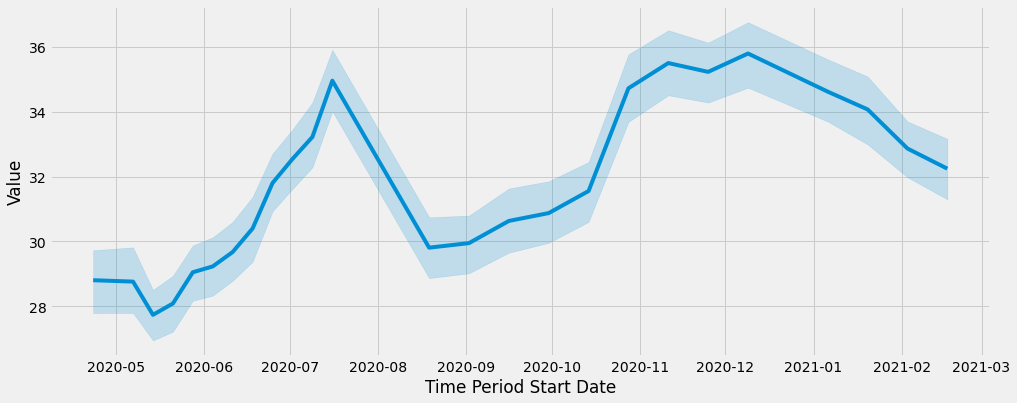

In [1138]:
# pessimistic view of world events
plt.figure(figsize=(15,6))
sns.lineplot(x='Time Period Start Date',y='Value',data=df_state)
plt.show()

In [1139]:
#convert to datetime object type and then extract age from the column into new "age" column
# df_state['Time Period Start Date'] = pd.to_datetime(df_state['Time Period Start Date'])
# df_state['year'] = df_state['Time Period Start Date'].dt.year

# import re
# age_pattern = r"\d{1,2}-\d{1,2}\syear\w*\sold"
#df_age['Subgroup'] = df_age[first_five]
#df_age['Subgroup'] = df_age['Subgroup'].str[5:]
df_age['age'] = df_age['Subgroup'].str[0:7]

In [1140]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               567 non-null    object 
 1   Group                   567 non-null    object 
 2   State                   567 non-null    object 
 3   Subgroup                567 non-null    object 
 4   Phase                   567 non-null    object 
 5   Time Period             567 non-null    int64  
 6   Time Period Label       567 non-null    object 
 7   Time Period Start Date  567 non-null    object 
 8   Time Period End Date    567 non-null    object 
 9   Value                   525 non-null    float64
 10  Low CI                  525 non-null    float64
 11  High CI                 525 non-null    float64
 12  Confidence Interval     525 non-null    object 
 13  Quartile Range          0 non-null      object 
 14  age                     567 non-null    ob

In [1141]:
df_age['Time Period Start Date'] = pd.to_datetime(df_age['Time Period Start Date'])

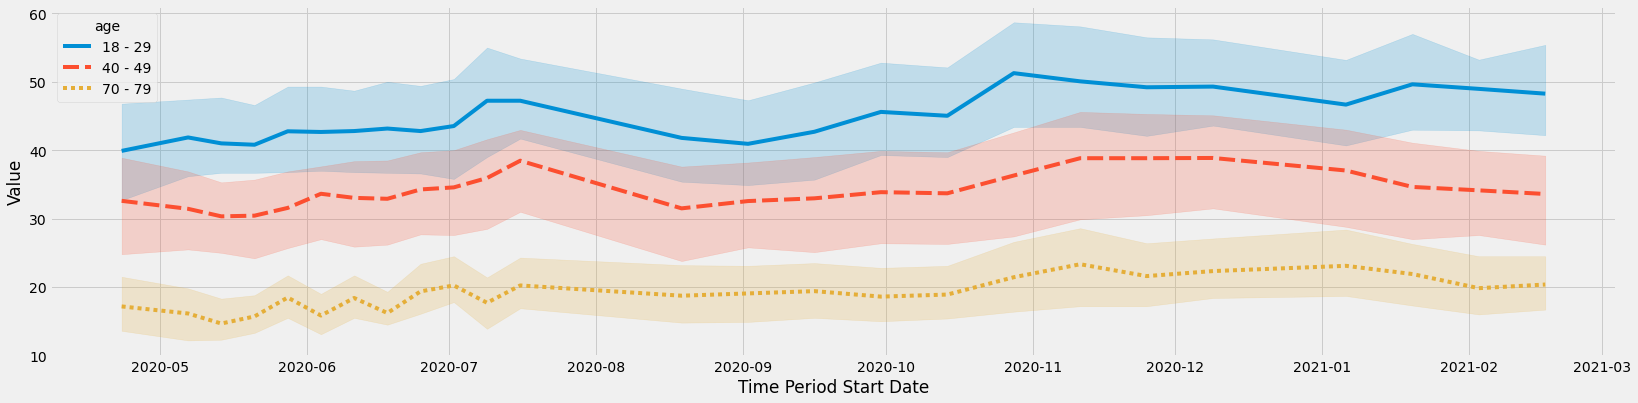

In [1142]:
plt.figure(figsize=(25,6))
filtered_data1=pd.DataFrame()
for value in ['18 - 29', '40 - 49', '70 - 79']:
    filtered_data1=filtered_data1.append(df_age[df_age['age'] == value])
    
sns.lineplot(x='Time Period Start Date', y='Value', hue="age", style = "age", data=filtered_data1)
plt.show()

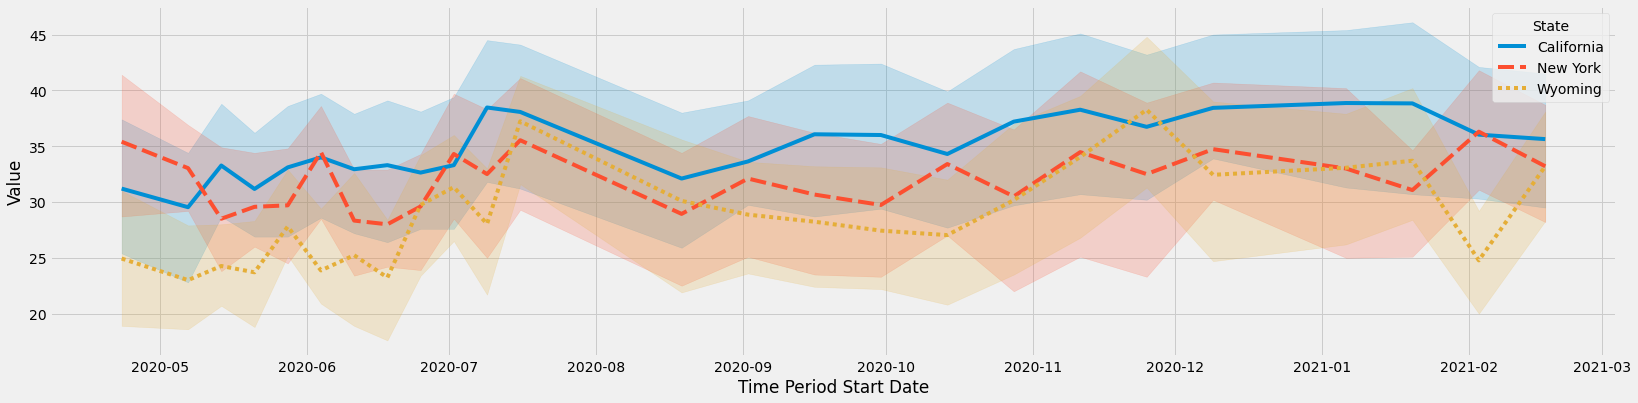

In [1143]:
plt.figure(figsize=(25,6))
filtered_data=pd.DataFrame()
for value in ['California', 'New York', 'Wyoming']:
    filtered_data=filtered_data.append(df_state[df_state['State'] == value])
   
sns.lineplot(x='Time Period Start Date',y='Value', hue="State", style="State", data=filtered_data)
plt.show()

In [1144]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 4 to 3824
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               225 non-null    object        
 1   Group                   225 non-null    object        
 2   State                   225 non-null    object        
 3   Subgroup                225 non-null    object        
 4   Phase                   225 non-null    object        
 5   Time Period             225 non-null    int64         
 6   Time Period Label       225 non-null    object        
 7   Time Period Start Date  225 non-null    datetime64[ns]
 8   Time Period End Date    225 non-null    object        
 9   Value                   225 non-null    float64       
 10  Low CI                  225 non-null    float64       
 11  High CI                 225 non-null    float64       
 12  Confidence Interval     225 non-null    object   

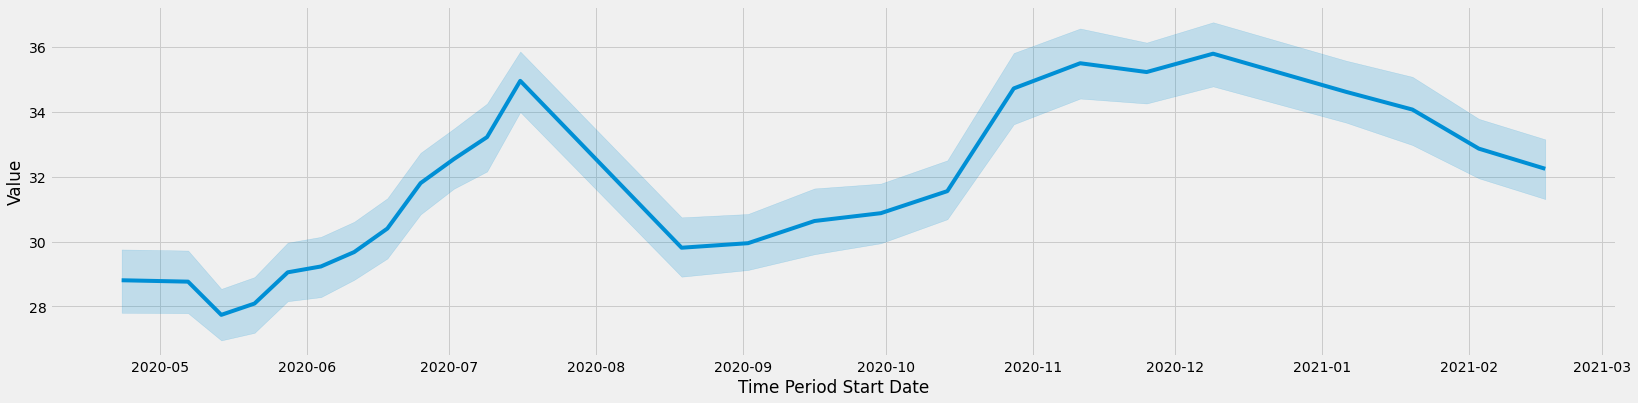

In [1145]:
plt.figure(figsize=(25,6))
sns.lineplot(x='Time Period Start Date', y='Value',data=df_state)
plt.show()

In [1146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5364 entries, 0 to 5363
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               5364 non-null   object 
 1   Group                   5364 non-null   object 
 2   State                   5364 non-null   object 
 3   Subgroup                5364 non-null   object 
 4   Phase                   5364 non-null   object 
 5   Time Period             5364 non-null   int64  
 6   Time Period Label       5364 non-null   object 
 7   Time Period Start Date  5364 non-null   object 
 8   Time Period End Date    5364 non-null   object 
 9   Value                   5250 non-null   float64
 10  Low CI                  5250 non-null   float64
 11  High CI                 5250 non-null   float64
 12  Confidence Interval     5250 non-null   object 
 13  Quartile Range          3825 non-null   object 
dtypes: float64(3), int64(1), object(10)
memo

In [1147]:
df1

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,37.0,32.5,41.8,32.5 - 41.8,36.0-38.2
5360,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,40.1,36.9,43.4,36.9 - 43.4,38.3-40.1
5361,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,39.1,32.9,45.5,32.9 - 45.5,38.3-40.1
5362,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,30.4,26.4,34.6,26.4 - 34.6,25.5-35.9


In [1148]:
df1=df1.dropna()
df1=df1.reset_index(drop=True)

In [1149]:
!pip install seaborn

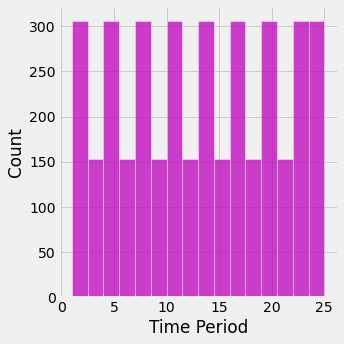

In [1150]:
# display the distribution
import seaborn as sns
sns.displot(df1["Time Period"], color="m")

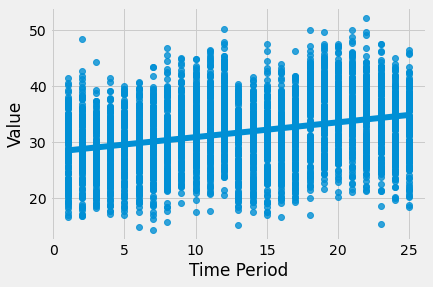

In [1151]:
sns.regplot(x="Time Period", y="Value", data=df1);

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value', ylabel='count'>

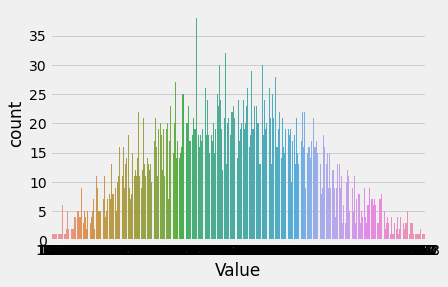

In [1152]:
sns.countplot(df1["Value"])

In [1153]:
# create a correlation table
# cluster the datasets
# Investigate the age group/gender/income
(df1['Time Period'].corr(df1['Value']))

0.2941249890152133

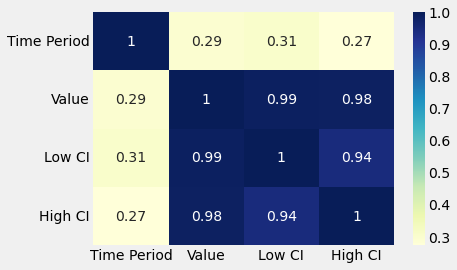

In [1154]:
# create a correlation heat map
df1_plot = sns.heatmap(df1.corr(), cmap = "YlGnBu", annot = True)

In [1155]:
df1

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
1,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
2,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
3,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
4,Symptoms of Depressive Disorder,By State,California,California,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,37.0,32.5,41.8,32.5 - 41.8,36.0-38.2
3821,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,40.1,36.9,43.4,36.9 - 43.4,38.3-40.1
3822,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,39.1,32.9,45.5,32.9 - 45.5,38.3-40.1
3823,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25,Feb 17 - Mar 1,2/17/2021 0:00,3/1/2021 0:00,30.4,26.4,34.6,26.4 - 34.6,25.5-35.9


In [1156]:
le = preprocessing.LabelEncoder()
df1["Low CI"] = le.fit_transform(df1["Low CI"])
df1["Indicator"] = le.fit_transform(df1["Indicator"])
df1["Group"] = le.fit_transform(df1["Group"])
df1["State"] = le.fit_transform(df1["State"])
df1["Subgroup"] = le.fit_transform(df1["Subgroup"])
#df1["Time Period Label"] = le.fit_transform(df1["Time Period Label"])
df1["Time Period Start Date"] = le.fit_transform(df1["Time Period Start Date"])
df1["Time Period End Date"] = le.fit_transform(df1["Time Period End Date"])
df1["Confidence Interval"] = le.fit_transform(df1["Confidence Interval"])
df1["Quartile Range"] = le.fit_transform(df1["Quartile Range"])
df1["High CI"] = le.fit_transform(df1["High CI"])
#df1["Value"] = le.fit_transform(df1["Value"])
df1["Time Period"] = le.fit_transform(df1["Time Period"])
df1["Phase"] = le.fit_transform(df1["Phase"])

In [1157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               3825 non-null   int32  
 1   Group                   3825 non-null   int32  
 2   State                   3825 non-null   int32  
 3   Subgroup                3825 non-null   int32  
 4   Phase                   3825 non-null   int32  
 5   Time Period             3825 non-null   int64  
 6   Time Period Label       3825 non-null   object 
 7   Time Period Start Date  3825 non-null   int32  
 8   Time Period End Date    3825 non-null   int32  
 9   Value                   3825 non-null   float64
 10  Low CI                  3825 non-null   int64  
 11  High CI                 3825 non-null   int64  
 12  Confidence Interval     3825 non-null   int32  
 13  Quartile Range          3825 non-null   int32  
dtypes: float64(1), int32(9), int64(3), objec

In [1158]:
df1

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,2,0,0,0,0,0,Apr 23 - May 5,9,13,18.6,27,27,50,5
1,2,0,1,1,0,0,Apr 23 - May 5,9,13,19.2,49,15,167,5
2,2,0,2,2,0,0,Apr 23 - May 5,9,13,22.4,75,51,408,44
3,2,0,3,3,0,0,Apr 23 - May 5,9,13,26.6,104,109,831,64
4,2,0,4,4,0,0,Apr 23 - May 5,9,13,25.4,106,82,860,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,1,0,46,46,2,24,Feb 17 - Mar 1,7,9,37.0,206,214,2644,239
3821,1,0,47,47,2,24,Feb 17 - Mar 1,7,9,40.1,250,230,3174,262
3822,1,0,48,48,2,24,Feb 17 - Mar 1,7,9,39.1,210,251,2710,262
3823,1,0,49,49,2,24,Feb 17 - Mar 1,7,9,30.4,145,142,1547,86


In [1159]:
#Dropping Time Period Label b/c it is already represented in Time Period Collumn
df1=df1.drop("Time Period Label", axis = 1)

In [1160]:
df1

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,2,0,0,0,0,0,9,13,18.6,27,27,50,5
1,2,0,1,1,0,0,9,13,19.2,49,15,167,5
2,2,0,2,2,0,0,9,13,22.4,75,51,408,44
3,2,0,3,3,0,0,9,13,26.6,104,109,831,64
4,2,0,4,4,0,0,9,13,25.4,106,82,860,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,1,0,46,46,2,24,7,9,37.0,206,214,2644,239
3821,1,0,47,47,2,24,7,9,40.1,250,230,3174,262
3822,1,0,48,48,2,24,7,9,39.1,210,251,2710,262
3823,1,0,49,49,2,24,7,9,30.4,145,142,1547,86


In [1161]:
# target Value
x = df1.drop("Value", axis = 1) 
y = df1[["Value"]]

In [1162]:
y

,Value
0,18.6
1,19.2
2,22.4
3,26.6
4,25.4
...,...
3820,37.0
3821,40.1
3822,39.1
3823,30.4


In [1163]:
#y.info()

In [1164]:
# split data into training test
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)

In [1165]:
# test feature data: features used to make predictions
x_test

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Start Date,Time Period End Date,Low CI,High CI,Confidence Interval,Quartile Range
3768,0,0,45,45,2,24,7,9,119,141,1082,37
3632,1,0,11,11,2,23,8,8,166,186,1956,144
1054,1,0,34,34,0,6,14,14,150,205,1641,186
2286,1,0,42,42,1,14,22,24,204,187,2614,201
1412,2,0,35,35,0,9,19,21,92,101,661,62
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,0,0,27,27,0,8,16,17,110,126,927,81
3519,2,0,0,0,2,23,8,8,133,142,1341,115
2860,1,0,4,4,3,18,4,3,293,286,3398,296
775,2,0,10,10,0,5,17,18,96,98,719,79


In [1166]:
# test target column: column value the model is predicting
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 3768 to 2753
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   765 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [1167]:
# fit the model
Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train, y_train)

LinearRegression()

In [1168]:
# get the prediction test
y_predict = Linear_Regression.predict(x_test)

In [1169]:
# print out y_predict
y_predict

array([[28.97494191],
       [33.57922078],
       [33.64087788],
       [35.62843328],
       [25.60076339],
       [22.81693192],
       [34.67000819],
       [40.11700156],
       [26.68324699],
       [34.13596829],
       [27.30306213],
       [34.76176402],
       [30.80405426],
       [38.08375587],
       [34.43423075],
       [36.18977236],
       [26.27984788],
       [32.50267399],
       [39.05944629],
       [32.84444354],
       [30.98468125],
       [32.72947923],
       [29.12618479],
       [30.45378   ],
       [34.84678856],
       [33.46170613],
       [29.27252975],
       [34.79055207],
       [30.84600451],
       [31.18071096],
       [46.52652428],
       [21.4275271 ],
       [34.01266285],
       [28.73573794],
       [39.57083412],
       [21.67388252],
       [33.41378958],
       [38.62932589],
       [23.86809582],
       [37.96378966],
       [32.08526782],
       [31.45837056],
       [29.19776001],
       [26.0994105 ],
       [33.84158304],
       [25

In [1170]:
from sklearn.metrics import mean_squared_error

In [1171]:
# rmse to test the accuracy
np.sqrt(mean_squared_error(y_test, y_predict))

0.0952914363509739

In [1172]:
line_y_ransac

array([[28.94457414],
       [34.79598982],
       [38.17795012],
       [35.08977729],
       [31.28916656],
       [21.22072283],
       [31.64322079],
       [30.44470389],
       [38.86646477],
       [21.84279977],
       [41.00444966],
       [25.50399682],
       [46.03075307],
       [23.82599857],
       [32.53973715],
       [36.95323114],
       [31.56280873],
       [23.28830269],
       [32.6072212 ],
       [35.26378406],
       [20.67523754],
       [36.87847001],
       [23.96019144],
       [21.29664587],
       [20.91709729],
       [20.72494895],
       [34.16762055],
       [31.83692536],
       [29.22789842],
       [36.35022704],
       [28.84289103],
       [16.86477087],
       [31.88888595],
       [28.88659266],
       [33.67630546],
       [29.05900951],
       [29.3182788 ],
       [32.21084159],
       [30.11932689],
       [41.05571131],
       [33.66643141],
       [29.43082615],
       [23.19716872],
       [24.57212832],
       [38.31817002],
       [36

In [1173]:
# rmse to test the accuracy
np.sqrt(mean_squared_error(y_test, line_y_ransac))

8.606936071683394

In [1174]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
!pip install xgboost
from xgboost import XGBRegressor

In [1175]:
df2=df1.values

In [1176]:
import xgboost as xb
from sklearn.metrics import mean_squared_error as MSE

xgb_r = xb.XGBRegressor(objective = 'reg:linear', n_estimators =10, seed=123)
xgb_r.fit(x_train, y_train)
pred= xgb_r.predict(x_test)

rmse=np.sqrt(MSE(y_test, pred))
print("RMSE: % f" %(rmse))

[11:01:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  0.997364


In [1177]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)
rF_pred = regressor.predict(x_test)
rf_error=np.sqrt(mean_squared_error(y_test, rF_pred))
print("RMSE: % f" %(rf_error))

C:\Users\Owner\AppData\Local\Temp/ipykernel_11220/1547343061.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RMSE:  0.113318


In [1178]:
#y_predict.info()
y_predict

array([[28.97494191],
       [33.57922078],
       [33.64087788],
       [35.62843328],
       [25.60076339],
       [22.81693192],
       [34.67000819],
       [40.11700156],
       [26.68324699],
       [34.13596829],
       [27.30306213],
       [34.76176402],
       [30.80405426],
       [38.08375587],
       [34.43423075],
       [36.18977236],
       [26.27984788],
       [32.50267399],
       [39.05944629],
       [32.84444354],
       [30.98468125],
       [32.72947923],
       [29.12618479],
       [30.45378   ],
       [34.84678856],
       [33.46170613],
       [29.27252975],
       [34.79055207],
       [30.84600451],
       [31.18071096],
       [46.52652428],
       [21.4275271 ],
       [34.01266285],
       [28.73573794],
       [39.57083412],
       [21.67388252],
       [33.41378958],
       [38.62932589],
       [23.86809582],
       [37.96378966],
       [32.08526782],
       [31.45837056],
       [29.19776001],
       [26.0994105 ],
       [33.84158304],
       [25

In [1179]:
true_vals=y_test.to_numpy()

In [1180]:
true_vals

array([[29. ],
       [33.6],
       [33.6],
       [35.6],
       [25.6],
       [22.9],
       [34.7],
       [40.1],
       [26.7],
       [34.2],
       [27.3],
       [34.8],
       [30.8],
       [38.1],
       [34.5],
       [36.2],
       [26.3],
       [32.5],
       [39. ],
       [32.9],
       [31. ],
       [32.7],
       [29.2],
       [30.4],
       [34.9],
       [33.5],
       [29.2],
       [34.8],
       [30.9],
       [31.2],
       [46.4],
       [21.5],
       [34. ],
       [28.7],
       [39.6],
       [21.6],
       [33.4],
       [38.6],
       [23.9],
       [38. ],
       [32.1],
       [31.5],
       [29.2],
       [26.1],
       [33.8],
       [25.7],
       [25.2],
       [35.2],
       [27.1],
       [39.9],
       [38.4],
       [22.5],
       [35.9],
       [30. ],
       [30.8],
       [32.5],
       [33.5],
       [28.1],
       [38.4],
       [31.4],
       [30.3],
       [36.5],
       [30.6],
       [26.5],
       [31.2],
       [28.4],
       [26

In [1181]:
x_train['new_col'] = range(1, len(x_train) + 1)

C:\Users\Owner\AppData\Local\Temp/ipykernel_11220/2363968271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['new_col'] = range(1, len(x_train) + 1)


In [1182]:
x_train

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Start Date,Time Period End Date,Low CI,High CI,Confidence Interval,Quartile Range,new_col
1193,1,0,20,20,0,7,15,16,180,164,2192,181,1
824,0,0,8,8,0,5,17,18,138,205,1442,194,2
1943,1,0,5,5,1,12,21,22,223,206,2884,237,3
820,0,0,4,4,0,5,17,18,192,160,2414,194,4
3427,0,0,10,10,2,22,0,7,229,228,2958,252,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,2,0,41,41,2,24,7,9,33,55,72,16,3056
3728,0,0,5,5,2,24,7,9,170,145,2021,159,3057
3734,0,0,11,11,2,24,7,9,144,175,1537,159,3058
780,2,0,15,15,0,5,17,18,91,105,645,79,3059


In [1183]:
index=x_train['new_col'].to_numpy()

In [1184]:
index

array([   1,    2,    3, ..., 3058, 3059, 3060], dtype=int64)

In [1185]:
print(x_train)


      Indicator  Group  State  Subgroup  Phase  Time Period  \
1193          1      0     20        20      0            7   
824           0      0      8         8      0            5   
1943          1      0      5         5      1           12   
820           0      0      4         4      0            5   
3427          0      0     10        10      2           22   
...         ...    ...    ...       ...    ...          ...   
3713          2      0     41        41      2           24   
3728          0      0      5         5      2           24   
3734          0      0     11        11      2           24   
780           2      0     15        15      0            5   
1964          1      0     26        26      1           12   

      Time Period Start Date  Time Period End Date  Low CI  High CI  \
1193                      15                    16     180      164   
824                       17                    18     138      205   
1943                      21  

In [1186]:
print(y_predict)

[[28.97494191]
 [33.57922078]
 [33.64087788]
 [35.62843328]
 [25.60076339]
 [22.81693192]
 [34.67000819]
 [40.11700156]
 [26.68324699]
 [34.13596829]
 [27.30306213]
 [34.76176402]
 [30.80405426]
 [38.08375587]
 [34.43423075]
 [36.18977236]
 [26.27984788]
 [32.50267399]
 [39.05944629]
 [32.84444354]
 [30.98468125]
 [32.72947923]
 [29.12618479]
 [30.45378   ]
 [34.84678856]
 [33.46170613]
 [29.27252975]
 [34.79055207]
 [30.84600451]
 [31.18071096]
 [46.52652428]
 [21.4275271 ]
 [34.01266285]
 [28.73573794]
 [39.57083412]
 [21.67388252]
 [33.41378958]
 [38.62932589]
 [23.86809582]
 [37.96378966]
 [32.08526782]
 [31.45837056]
 [29.19776001]
 [26.0994105 ]
 [33.84158304]
 [25.72833491]
 [25.14528326]
 [35.12856402]
 [27.14865644]
 [39.79896896]
 [38.44934212]
 [22.52215535]
 [35.86062716]
 [30.07576936]
 [30.84469346]
 [32.48281276]
 [33.55596423]
 [28.06998621]
 [38.32911273]
 [31.41179044]
 [30.23680476]
 [36.46734969]
 [30.56514378]
 [26.47225006]
 [31.22010838]
 [28.37024147]
 [26.32475

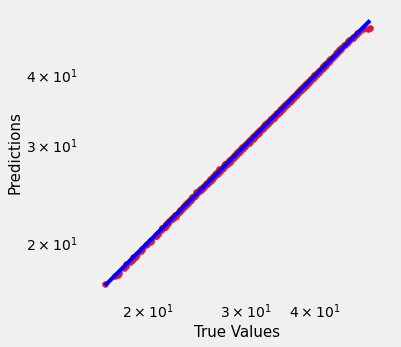

In [1187]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict), max(true_vals))
p2 = min(min(y_predict), min(true_vals))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

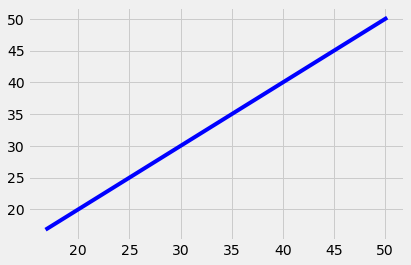

In [1188]:
p1 = max(max(y_predict), max(true_vals))
p2 = min(min(y_predict), min(true_vals))
plt.plot([p1, p2], [p1, p2], 'b-')

In [1189]:
df

,Value
0,34.428438
1,31.834142
2,37.871642
3,23.821927
4,34.146749
...,...
760,29.381710
761,33.257876
762,30.139534
763,19.805202
